<a href="https://colab.research.google.com/github/Boadzie/Jupyter-Notebooks/blob/master/Sound_Analysis_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sound_Analysis and Classification.ipynb

### Classes of Sound include:

1. Volcanic Eruption (1hour of mp3)
2. Hurricane         (2hour 30min of mp3)

In [0]:
# Installing dependencies
!pip install pydub
!pip install youtube_dl

     |████████████████████████████████| 1.8MB 2.8MB/s 


In [0]:
# Downloading the data from Youtube
from __future__ import unicode_literals
import youtube_dl


ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192',
    }],
}

with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download(['https://www.youtube.com/watch?v=Sh09jaKZeWY&t=2077s','https://www.youtube.com/watch?v=HBjpO6zJ2y8'])

[youtube] Sh09jaKZeWY: Downloading webpage
[youtube] Sh09jaKZeWY: Downloading video info webpage
[youtube] Sh09jaKZeWY: Downloading js player vflFbRRRp
[youtube] Sh09jaKZeWY: Downloading js player vflFbRRRp
[youtube] Sh09jaKZeWY: Downloading MPD manifest
[dashsegments] Total fragments: 722
[download] Destination: Volcano Soundscape _ Fire, Magma, and Calamitous Seismic Sounds-Sh09jaKZeWY.m4a
[download] 100% of 54.56MiB in 00:21
[ffmpeg] Correcting container in "Volcano Soundscape _ Fire, Magma, and Calamitous Seismic Sounds-Sh09jaKZeWY.m4a"
[ffmpeg] Destination: Volcano Soundscape _ Fire, Magma, and Calamitous Seismic Sounds-Sh09jaKZeWY.mp3
Deleting original file Volcano Soundscape _ Fire, Magma, and Calamitous Seismic Sounds-Sh09jaKZeWY.m4a (pass -k to keep)
[youtube] HBjpO6zJ2y8: Downloading webpage
[youtube] HBjpO6zJ2y8: Downloading video info webpage
[download] Destination: 💨 Hurricane Wind Storm Sounds For Sleeping, Relaxing ~ Heavy Blowing Gale Gust Leaves Ambience-HBjpO6zJ2y8.we

## Converting Audio Files from .mp3 to .wav

In [0]:
#convert volcanic_eruption mp3 to .wav
from pydub import AudioSegment

sound = AudioSegment.from_mp3("volcanic_eruption.mp3")
sound.export("volcanic_eruption.wav", format="wav")

<_io.BufferedRandom name='volcanic_eruption.wav'>

In [0]:
#convert hurricane mp3 to .wav
from pydub import AudioSegment

sound = AudioSegment.from_mp3("hurricane.mp3")
sound.export("hurricane.wav", format="wav")

<_io.BufferedRandom name='hurricane.wav'>

## Extracting Chunks of Audios

In [0]:
from pydub import AudioSegment
import os
if not os.path.exists("volcanic_eruption"):
    os.makedirs("volcanic_eruption")

count=1
for i in range(1,1000,15):
    t1 = i * 1000 #Works in milliseconds
    t2 = (i+15) * 1000
    newAudio = AudioSegment.from_wav("volcanic_eruption.wav")
    newAudio = newAudio[t1:t2]
    newAudio.export('volcanic_eruption/'+str(count)+'.wav', format="wav") #Exports to a wav file in the current path.
    print(count)
    count+=1

In [0]:
# do the same for the Hurricane.wav
if not os.path.exists("hurricane"):
    os.makedirs("hurricane")

count=1
for i in range(1,1000,15):
    t1 = i * 1000 #Works in milliseconds
    t2 = (i+15) * 1000
    newAudio = AudioSegment.from_wav("hurricane.wav")
    newAudio = newAudio[t1:t2]
    newAudio.export('hurricane/'+str(count)+'.wav', format="wav") #Exports to a wav file in the current path.
    print(count)
    count+=1

## Plotting Amplitude Waveforms

In [0]:
# Plots for volcanic_eruption
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from os import walk
import os
if not os.path.exists("volcanic_eruptionPlots"):
    os.makedirs("volcanic_eruptionPlots")
volcanic_wavs = []
for (_,_,filenames) in walk('volcanic_eruption'):
    volcanic_wavs.extend(filenames)
    break
for volcanic_wav in volcanic_wavs:
    # read audio samples
    input_data = read("volcanic_eruption/" + volcanic_wav)
    audio = input_data[1]
    # plot the first 1024 samples
    plt.plot(audio)
    # label the axes
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    # set the title
    # plt.title("Sample Wav")
    # display the plot
    plt.savefig("volcanic_eruptionPlots/" + volcanic_wav.split('.')[0] + '.png')
    # plt.show()
    plt.close('all')

In [0]:
if not os.path.exists("hurricanePlots"):
    os.makedirs("hurricanePlots")
hurricane_wavs = []
for (_,_,filenames) in walk('hurricane'):
    hurricane_wavs.extend(filenames)
    break
for hurricane_wav in hurricane_wavs:
    # read audio samples
    input_data = read("hurricane/" + hurricane_wav)
    audio = input_data[1]
    # plot the first 1024 samples
    plt.plot(audio)
    # label the axes
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    # set the title
    # plt.title("Sample Wav")
    # display the plot
    plt.savefig("hurricanePlots/" + hurricane_wav.split('.')[0] + '.png')
    # plt.show()
    plt.close('all')

# Using Just Machine Learning with Sklearn

In [0]:
# import the libraries
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

from skimage.io import imread
from skimage.transform import resize

from PIL import Image

In [0]:
!unzip images.zip # unzipping data

In [0]:
# Load images in structured directory like it's sklearn sample dataset

def load_image_files(container_path, dimension=(64, 64)):
    """
    Load image files with categories as subfolder names 
    which performs like scikit-learn sample dataset
    
    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to
        
    Returns
    -------
    Bunch
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)



In [0]:
import skimage
image_dataset = load_image_files("images/")

In [0]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

In [0]:
# Train data with parameter optimization¶(using svc)
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
# Making a prediction
y_pred = clf.predict(X_test)

y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [0]:
# Generating a Report

print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        22

    accuracy  

<Figure size 432x576 with 0 Axes>

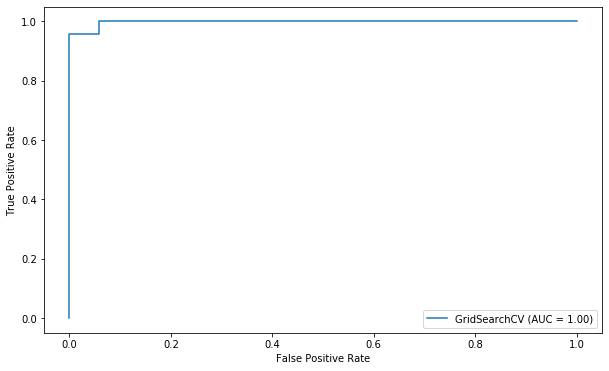

In [0]:
# Visualizing the model's performance using ROC curve
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)


figure = plt.figure(figsize=(6, 8))
svc_disp = plot_roc_curve(clf, X_test, y_test)

<Figure size 3600x576 with 0 Axes>

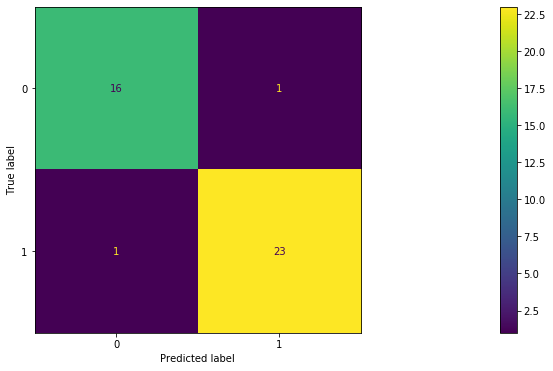

In [0]:
# Plotting the confussion matrix
plt.rcParams["figure.figsize"] = (50,6)


fig= plt.figure(figsize=(50, 8))
plot = metrics.plot_confusion_matrix(clf, X_test, y_test)

In [0]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Uisng Other models
from sklearn.ensemble import  RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import roc_auc_score 

import xgboost

# getting the model's performance metrics
for model in [LogisticRegression, KNeighborsClassifier, RandomForestClassifier, 
              AdaBoostClassifier,xgboost.XGBClassifier]:
              cls = model()
              kfold = model_selection.KFold(n_splits=10, random_state=42)
              s = model_selection.cross_validate(cls, X_test, y_test, scoring=["accuracy", "recall", "precision", "f1"], cv=kfold)
              print(f"{model.__name__:22} Accuracy: "f"{s['test_accuracy'].mean().round(2)}   Recall: {s['test_recall'].mean().round(2)} \
                    Precision: {s['test_precision'].mean().round(2)}   F1-score: {s['test_recall'].mean().round(2)}")


LogisticRegression     Accuracy: 0.9   Recall: 0.98                     Precision: 0.88    F1-score: 0.98
KNeighborsClassifier   Accuracy: 0.78   Recall: 0.94                     Precision: 0.74    F1-score: 0.94
RandomForestClassifier Accuracy: 1.0   Recall: 1.0                     Precision: 1.0    F1-score: 1.0
AdaBoostClassifier     Accuracy: 1.0   Recall: 1.0                     Precision: 1.0    F1-score: 1.0
XGBClassifier          Accuracy: 1.0   Recall: 1.0                     Precision: 1.0    F1-score: 1.0


In [0]:
cls = cls.fit(X_test, y_test) # testing the model

<Figure size 432x576 with 0 Axes>

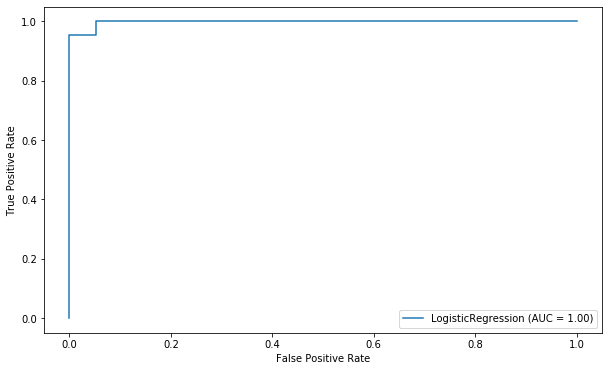

<Figure size 432x576 with 0 Axes>

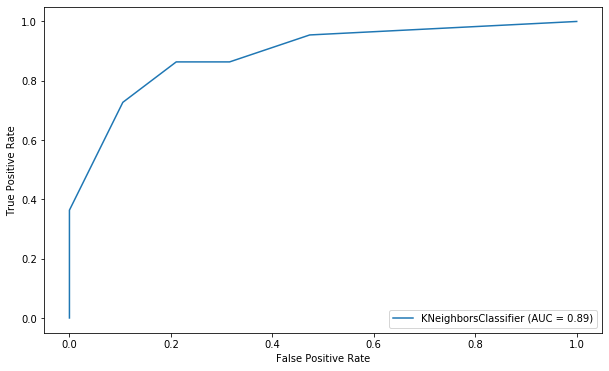

<Figure size 432x576 with 0 Axes>

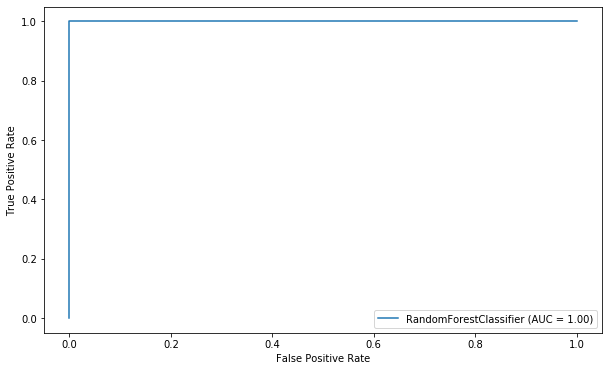

<Figure size 432x576 with 0 Axes>

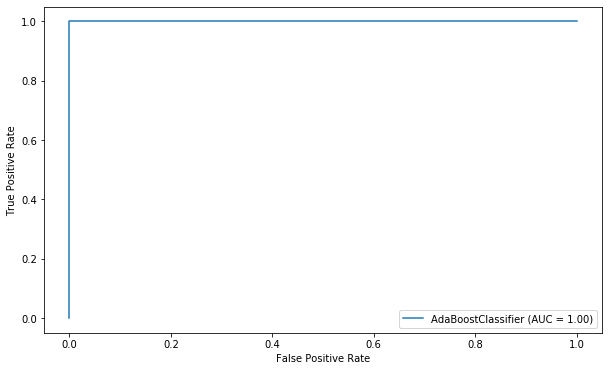

<Figure size 432x576 with 0 Axes>

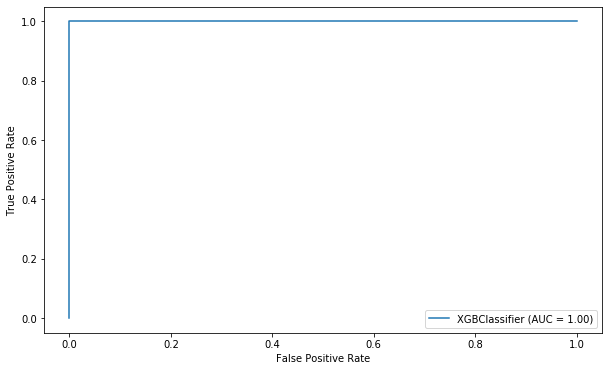

In [0]:
# Visualizing the model
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

for model in [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), 
              AdaBoostClassifier(),xgboost.XGBClassifier()]:
              cls = model.fit(X_train, y_train)
              figure = plt.figure(figsize=(6, 8))
              disp = plot_roc_curve(cls, X_test, y_test)



In [0]:
# Saving the model
import pickle

with open('sound_ml_model.pkl', 'wb') as model:
  pickle.dump(clf, model)

# Using Transfer Learning 

## Extracting Features and Training LinearSVM

In [0]:
import os
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

# using the pretrianed VGG19 model
base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('flatten').output)

def get_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    flatten = model.predict(x)
    return list(flatten[0])

X = []
y = []

# learning the features of our dataset
volcanic_plots = []
for (_,_,filenames) in os.walk('volcanic_eruptionPlots'):
    volcanic_plots.extend(filenames)
    break

for vplot in volcanic_plots:
    X.append(get_features('volcanic_eruptionPlots/' + vplot))
    y.append(0)

hurricane_plots = []
for (_,_,filenames) in os.walk('hurricanePlots'):
    hurricane_plots.extend(filenames)
    break

for hplot in hurricane_plots:
    X.append(get_features('hurricanePlots/' + hplot))
    y.append(1)


Using TensorFlow backend.






574717952/574710816 [==============================] - 6s 0us/step








In [0]:
# Building a LinearSVC model on top of our model
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

# get the accuracy
print (accuracy_score(y_test, predicted))

In [0]:
# Testing model using k_fold crosss validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=10)
scores.mean()

1.0

<Figure size 432x576 with 0 Axes>

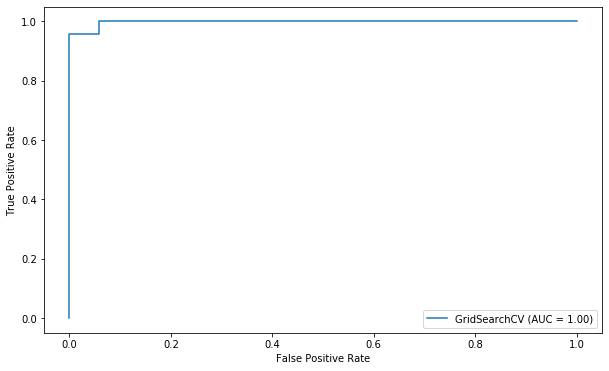

In [0]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)


figure = plt.figure(figsize=(6, 8))
svc_disp = plot_roc_curve(clf, X_test, y_test)

## Saving the model

In [0]:
import pickle

with open('sound_model.pkl', 'wb') as model:
  pickle.dump(clf, model)